# Project6 - Bank Churn Prediction using Neural Networks

## Objective:

Given a Bank customer, build a neural network-based classifier that can determine whether they will leave or not in the next 6 months.

## Context: 

Businesses like banks that provide service have to worry about the problem of 'Churn' i.e. customers leaving and joining another service provider. It is important to understand which aspects of the service influence a customer's decision in this regard. Management can concentrate efforts on the improvement of service, keeping in mind these priorities.

## Data Description: 

The case study is from an open-source dataset from Kaggle. The dataset contains 10,000 sample points with 14 distinct features such as CustomerId, CreditScore, Geography, Gender, Age, Tenure, Balance, etc.
Link to the Kaggle project site:https://www.kaggle.com/barelydedicated/bank-customer-churn-modeling
Data Dictionary:

- RowNumber: Row number.
- CustomerId: Unique identification key for different customers.
- Surname: Surname of the customer
- Credit Score: Credit score is a measure of an individual's ability to pay back the borrowed amount. It is the numerical representation of their creditworthiness. A credit score is a 3-digit number that falls in the range of 300-900, 900 being the highest.
- Geography: The country to which the customer belongs.
- Gender: The gender of the customer.
- Age: Age of the customer.
- Tenure: The period of time a customer has been associated with the bank.
- Balance: The account balance (the amount of money deposited in the bank account) of the customer.
- NumOfProducts: How many accounts, bank account affiliated products the person has.
- HasCrCard: Does the customer have a credit card through the bank?
- IsActiveMember: Subjective, but for the concept
- EstimatedSalary: Estimated salary of the customer.
- Exited: Did they leave the bank after all?

#### Points Distribution:
The points distribution for this case is as follows:

1. Read the dataset
2. Drop the columns which are unique for all users like IDs (5 points)
3. Perform bivariate analysis and give your insights from the same (5 points) 
4. Distinguish the feature and target set and divide the data set into training and test sets (5 points)
5. Normalize the train and test data (10points)
6. Initialize & build the model. Identify the points of improvement and implement the same. (20)
7. Predict the results using 0.5 as a threshold (10points)
8. Print the Accuracy score and confusion matrix (5 points)

## 0.Read the required libraries

#### Get the required libraries

In [1]:
## Install and import the tensorflow libraries
#!pip install tensorflow
import tensorflow as tf
print(tf.__version__)

2.4.1


In [2]:
import pandas as pd
import numpy as np
import seaborn as sns

# To enable plotting graphs in Jupyter notebook
%matplotlib inline

# for ignoring warnings
import warnings
warnings.filterwarnings('ignore') 

# import model splitting and preprocessing library
from sklearn.model_selection import train_test_split
from sklearn import preprocessing

# import the library libraries for model creation and optimization
from tensorflow.keras.models import Sequential #---Sequential ANN; Each layer is connected to the next layer
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization
from tensorflow.keras import optimizers

# import the required metrics libraries
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, f1_score, precision_recall_curve, auc

# import the plotting library
import matplotlib.pyplot as plt

#Import keras library
from tensorflow import keras

#import random number generator library
import random as rn

#plotting missing values
import missingno as msno_plot 

#### Set the seed values

In [3]:
tf.random.set_seed(123)
np.random.seed(123)
rn.seed(125)

## 1. Read the dataset

#### Read the bank customer data

In [4]:
file = tf.keras.utils
bank_df = pd.read_csv('bank.csv')
bank_df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


#### Checking the shape

In [5]:
bank_df.shape

(10000, 14)

<b>Comment</b>: 10,000 customer records with 13 features each and the rownumber

#### Check the datatypes of columns

In [6]:
bank_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


<b>Comment</b>: All feature datatypes are as expected
Surname, Geograply and Gender are object datatype as they are non-numeric/categorical. We will perform one hot encoding later. 

#### Checking if any missing values

In [7]:
bank_df.isna().sum().sum()

0

<b>Comment</b>: No missing values

#### Check and drop duplicates if any

In [8]:
bank_df.drop_duplicates(inplace=True)

In [9]:
bank_df.shape

(10000, 14)

<b>Comment</b>: No duplicates

#### Check if there are any duplicate customers

In [10]:
bank_df_customerdupcheck = bank_df.groupby('CustomerId')

In [11]:
bank_df_customerdupcheck.filter(lambda x: len(x) > 1) 

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited


<b>Comment</b>: No duplicate customers

#### Checking the missing values using Barplot

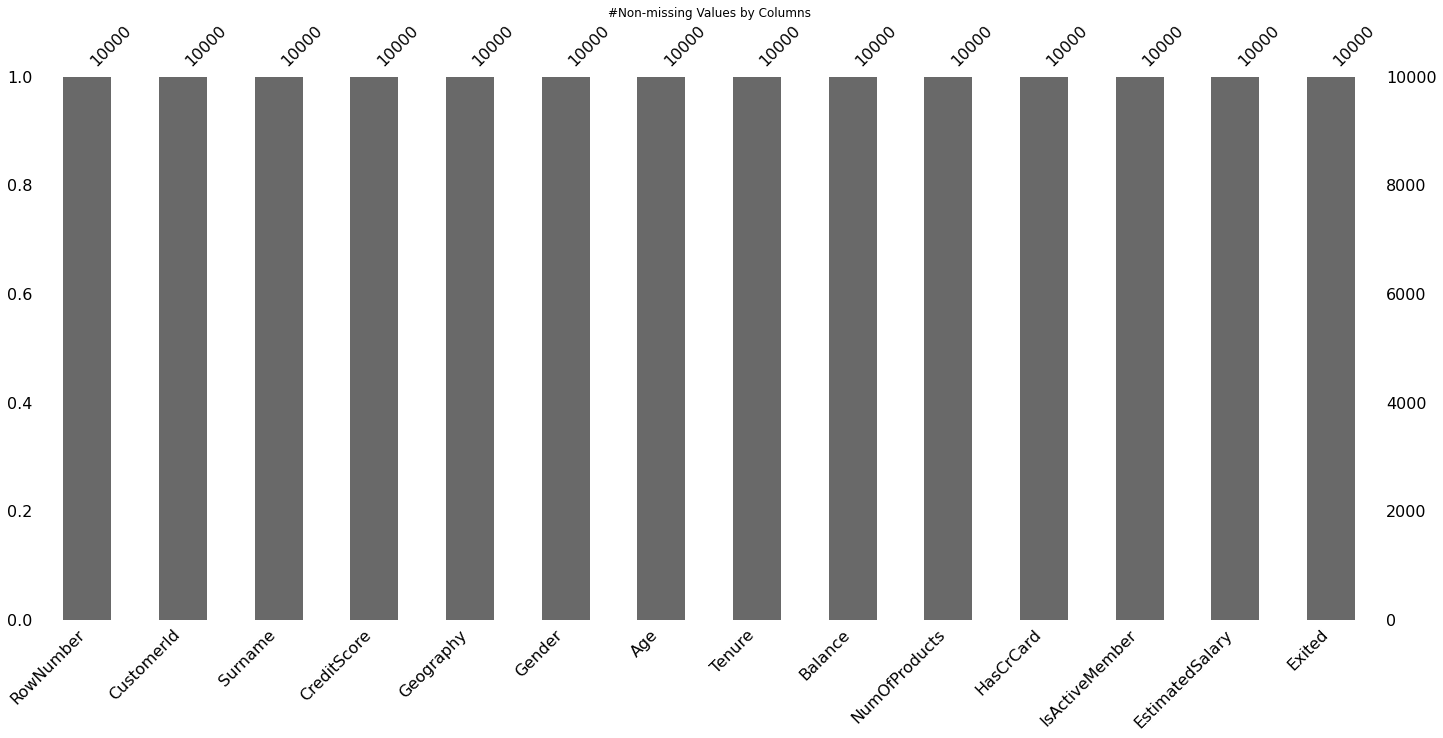

In [12]:
plt.title('#Non-missing Values by Columns')
msno_plot.bar(bank_df);

<b>Comment</b>: No missing values

#### Univariate Analysis: Check the distribution of features

In [13]:
bank_df.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


<b>Comment</b>:
- Credit score is between 350 and 850 with mean score of 650.
- Age of the customers is between 18 and 92 with mean age of 38years
- Tenure of the customers is between 0 to 10years(assuming it is years as it is not specified in the question.) with an average tenure of 5 years
- Balance of customer is between 0 to 250,898 with mean balance of 76,485.
- Number of products is between 1 to 4 with an average of 1.5 products
- Credit cards range is between 0 to 1 with an average of 0.45
- Active members are on an average 0.5. Looks like around 50% of customers are active
- Estimated salary range is between 11 and 199,992 with an average of 100,090.
- Exited customers average is 0.2. So around 20% of the data has exited customers. Assuming they exited in 6 months as it is not specified in the question. 

#### We will convert the Gender to  as (Male:1 and Female:0)

In [14]:
bank_df.Gender.value_counts()

Male      5457
Female    4543
Name: Gender, dtype: int64

In [15]:
mapping = {'Male': 1, 'Female': 0}
bank_df.replace({'Gender': mapping}, inplace=True)
bank_df.Gender.value_counts()

1    5457
0    4543
Name: Gender, dtype: int64

In [16]:
bank_df['Gender'] = bank_df['Gender'].astype('int')
bank_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  int64  
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(10), object(2)
memory usage: 1.1+ MB


#### We will check categorical feature "Geography"

In [17]:
bank_df['Geography'].unique()

array(['France', 'Spain', 'Germany'], dtype=object)

In [18]:
bank_df.Geography.value_counts()

France     5014
Germany    2509
Spain      2477
Name: Geography, dtype: int64

<b>Comment</b>: Only 3 regions data. We will perform one hot encoding later. 

#### Checking the "Exited" feature unique values

In [19]:
bank_df['Exited'].value_counts()

0    7963
1    2037
Name: Exited, dtype: int64

<b>Comment</b>: Around 20% of the data has exited customers

## 2. Drop the columns which are unique for all users like IDs (5 points)


#### We will drop Row Number, Customer id and Surname as they are not required

In [20]:
bank_df2 = bank_df.copy()
bank_df2.drop(columns=['RowNumber','CustomerId','Surname'], inplace = True)
bank_df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10000 entries, 0 to 9999
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CreditScore      10000 non-null  int64  
 1   Geography        10000 non-null  object 
 2   Gender           10000 non-null  int64  
 3   Age              10000 non-null  int64  
 4   Tenure           10000 non-null  int64  
 5   Balance          10000 non-null  float64
 6   NumOfProducts    10000 non-null  int64  
 7   HasCrCard        10000 non-null  int64  
 8   IsActiveMember   10000 non-null  int64  
 9   EstimatedSalary  10000 non-null  float64
 10  Exited           10000 non-null  int64  
dtypes: float64(2), int64(8), object(1)
memory usage: 937.5+ KB


<b>Comment</b>: Row Number, Customer id and Surname features are dropped

In [21]:
#### We will perform one hot encoding on Geography.

In [22]:
bank_df2['Geography'] = bank_df2['Geography'].astype('category')
bank_df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10000 entries, 0 to 9999
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype   
---  ------           --------------  -----   
 0   CreditScore      10000 non-null  int64   
 1   Geography        10000 non-null  category
 2   Gender           10000 non-null  int64   
 3   Age              10000 non-null  int64   
 4   Tenure           10000 non-null  int64   
 5   Balance          10000 non-null  float64 
 6   NumOfProducts    10000 non-null  int64   
 7   HasCrCard        10000 non-null  int64   
 8   IsActiveMember   10000 non-null  int64   
 9   EstimatedSalary  10000 non-null  float64 
 10  Exited           10000 non-null  int64   
dtypes: category(1), float64(2), int64(8)
memory usage: 869.2 KB


In [23]:
bank_df2 = pd.get_dummies(bank_df2)
bank_df2

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_France,Geography_Germany,Geography_Spain
0,619,0,42,2,0.00,1,1,1,101348.88,1,1,0,0
1,608,0,41,1,83807.86,1,0,1,112542.58,0,0,0,1
2,502,0,42,8,159660.80,3,1,0,113931.57,1,1,0,0
3,699,0,39,1,0.00,2,0,0,93826.63,0,1,0,0
4,850,0,43,2,125510.82,1,1,1,79084.10,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,771,1,39,5,0.00,2,1,0,96270.64,0,1,0,0
9996,516,1,35,10,57369.61,1,1,1,101699.77,0,1,0,0
9997,709,0,36,7,0.00,1,0,1,42085.58,1,1,0,0
9998,772,1,42,3,75075.31,2,1,0,92888.52,1,0,1,0


<b>Comment</b>: 3 geography columns created.

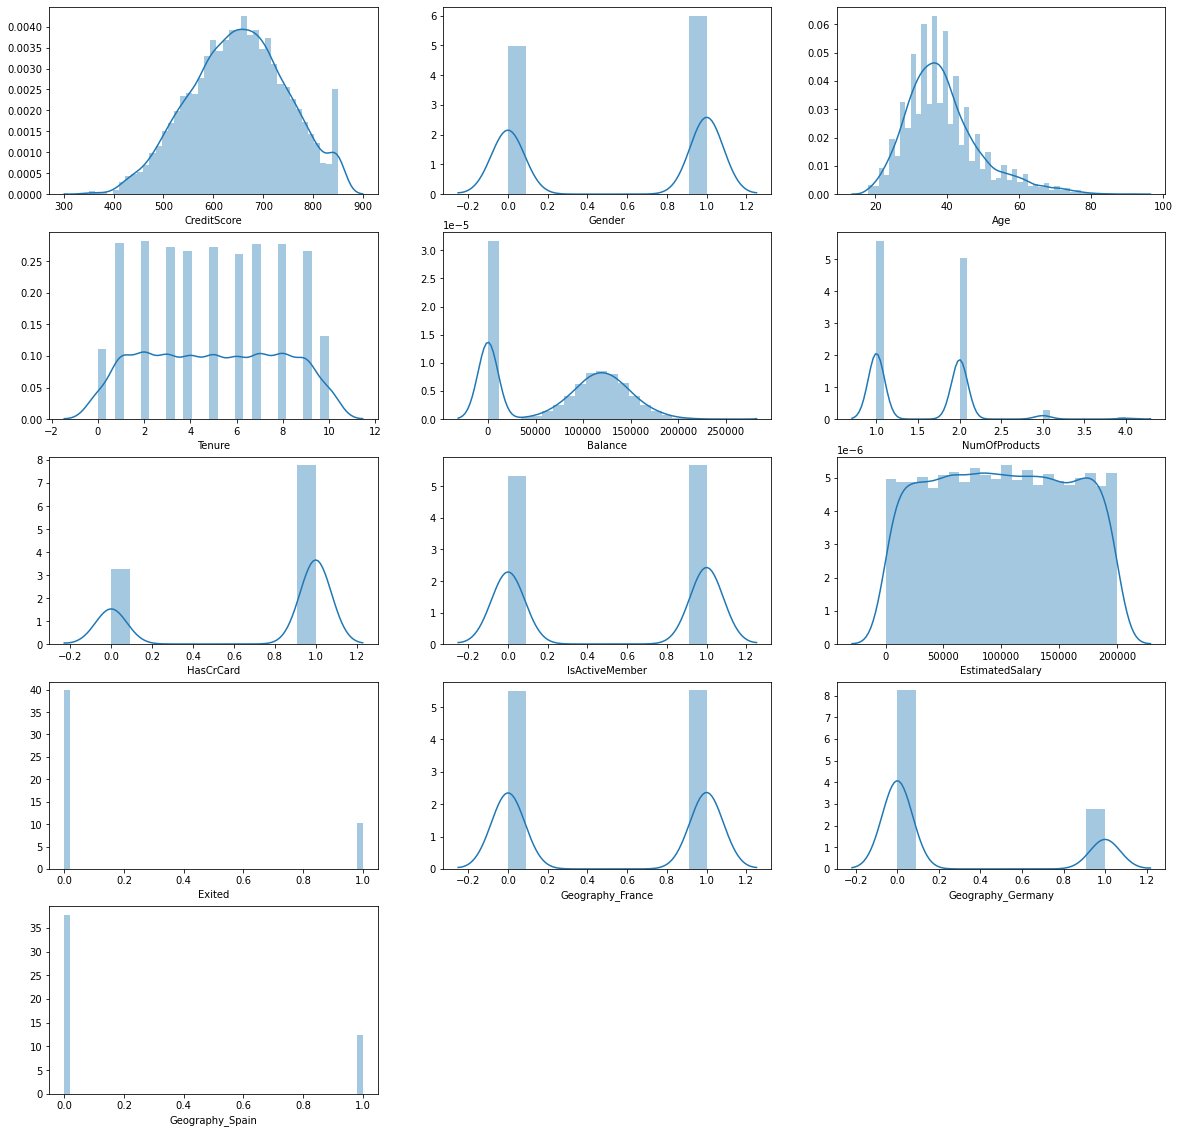

In [24]:
#analysis of the body of distributions/tails by drawing the histogram
plt.figure(figsize=(20,20))
pos = 1
for i in bank_df2.columns:
    plt.subplot(5, 3, pos)
    sns.distplot(bank_df2[i])
    pos += 1 

<b>Comment</b>:
- Most customers have either 1 or 2 products
- More customers have 2 Credit cards
- Active members and Non-Active customer ratio is even.
- Around 50% of the records are from France Geography

## 3. Perform bivariate analysis and give your insights from the same (5 points) 


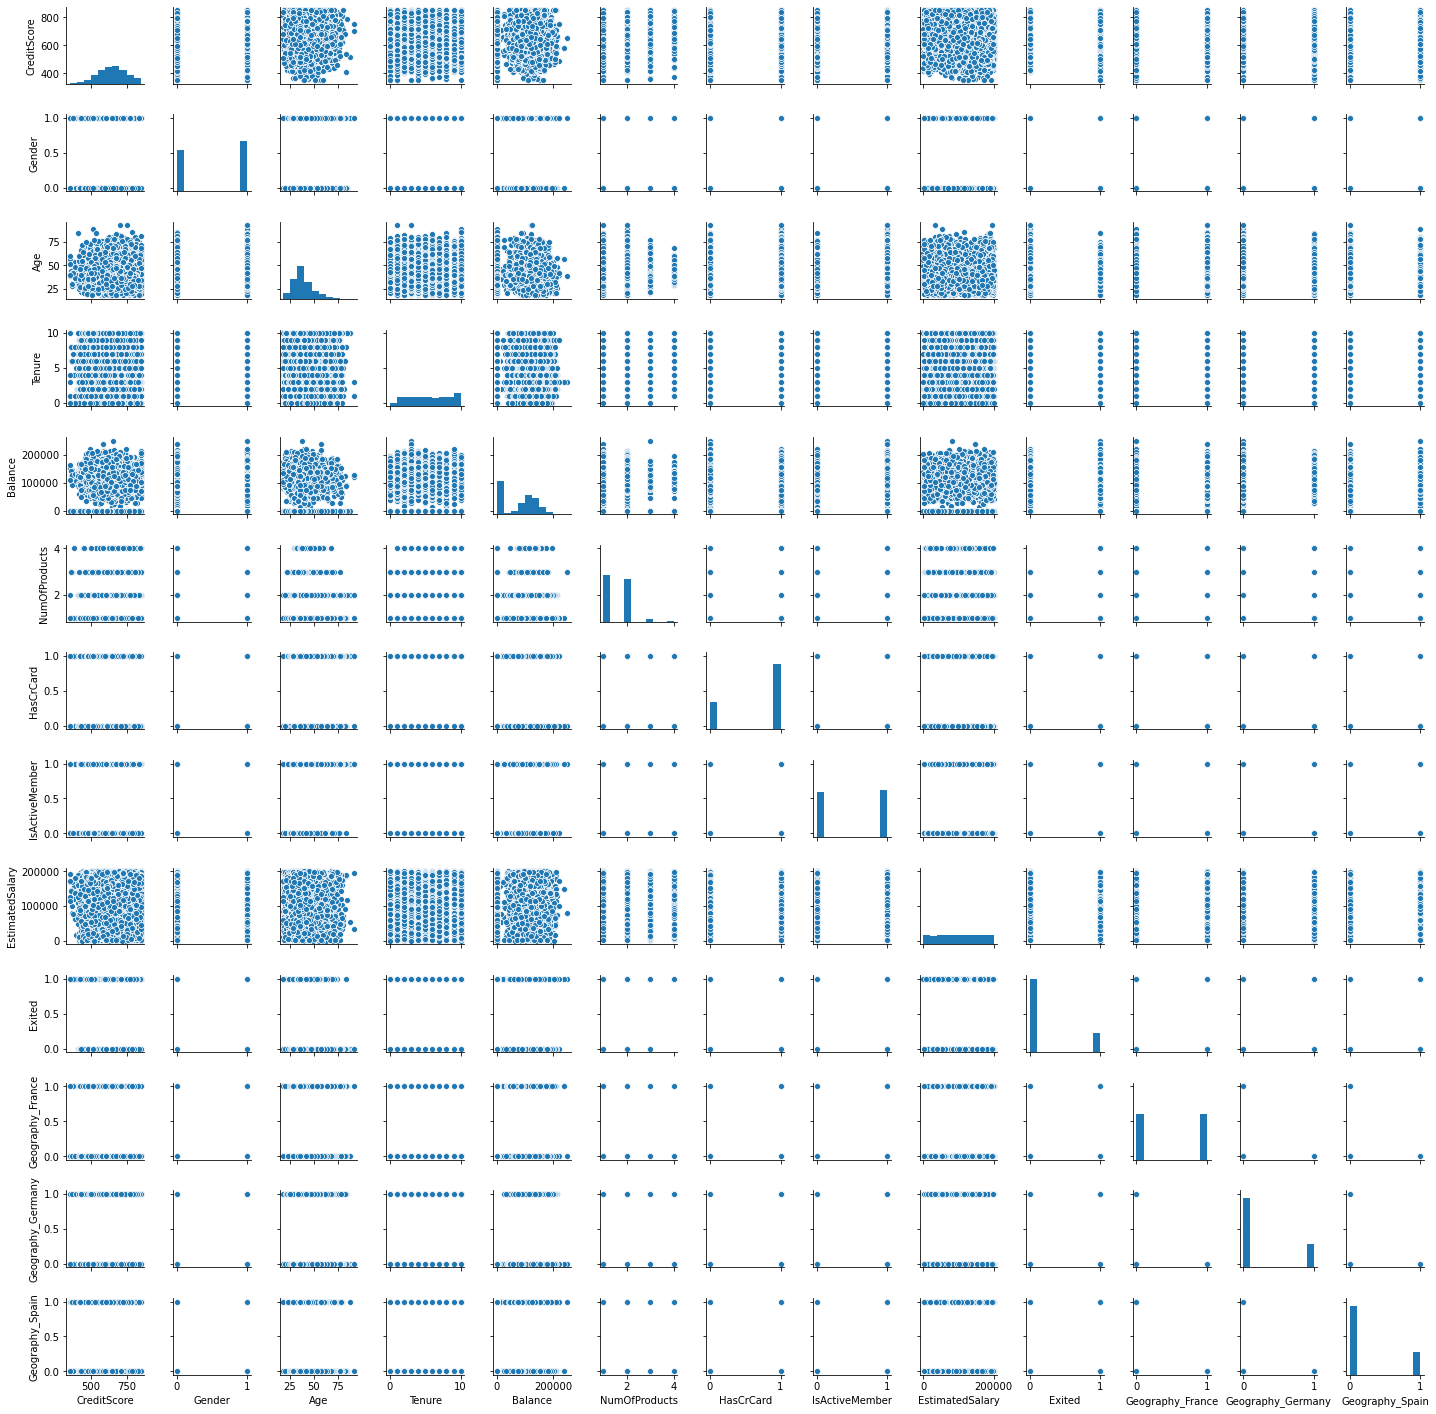

In [25]:
#Bivariate analysis of the features
sns.pairplot(bank_df2, diag_kind='hist', height=1.5)

<b>Comment</b>: Cannot conclude much from above. We will do detail analysis below. 

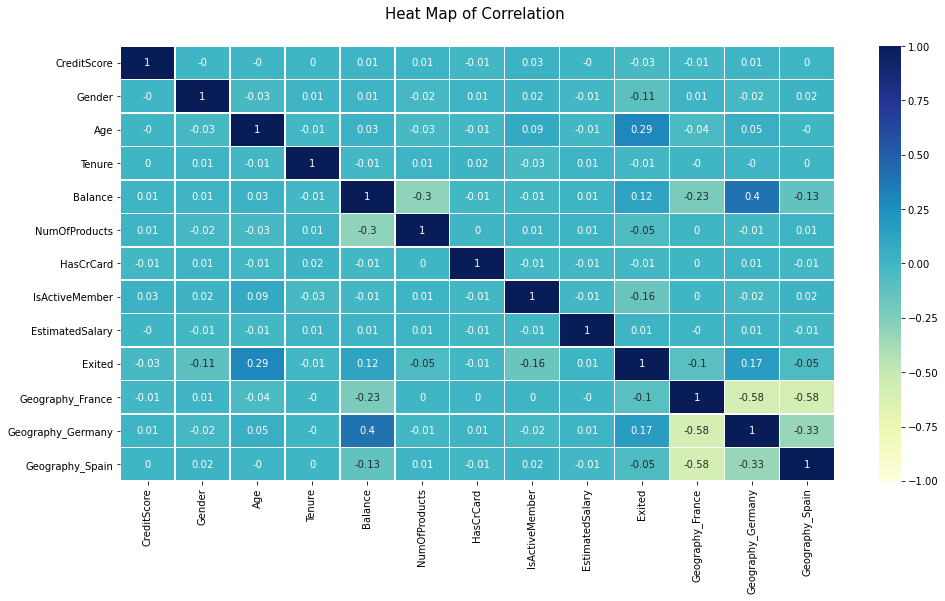

In [26]:
#Getting Correlation Data
corr_data = bank_df2.corr().round(2);

fig, ax = plt.subplots()
fig.set_size_inches(16, 8)

#Plotting a heat map of different features
plt.title('Heat Map of Correlation \n',fontsize=15, pad=10)

sns.heatmap(corr_data,annot=True,cmap='YlGnBu',vmin=-1,vmax=1, linewidths=.5, center=0);

<b>Comment</b>: From the above correlation table, we can see a little amount of feature correlation as follows.
- Postive correlation(0.29) between Age and Exited.
- Negative correlation(-0.3) between Balance and Number of products.
- There is some correlation amoung the geographies but we will ingore.

#### We will check the relation between Age, Balance and Exited features

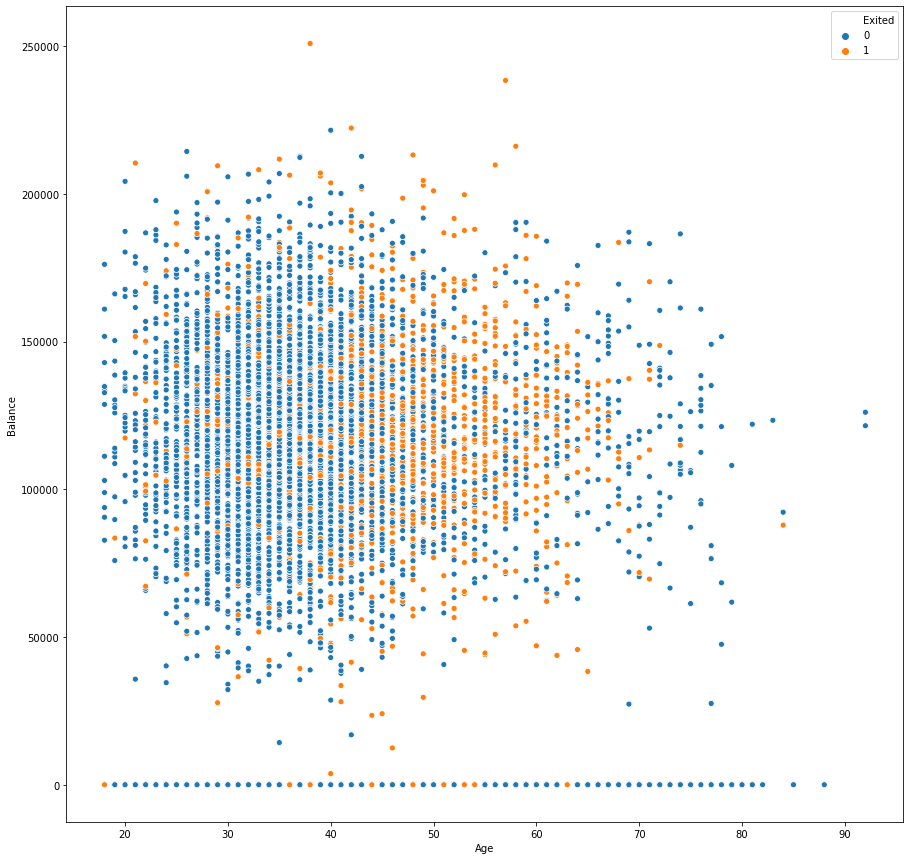

In [27]:
plt.figure(figsize=(15,15))
sns.scatterplot(y="Balance", x="Age", hue="Exited", data=bank_df2, legend = "brief", sizes=(20, 200))
#,size = ""

<b>Comment</b>: More exits across age (40 to 65) and balance (75K to 150K)

#### We will check the relation between Age, Credit score and Exited features

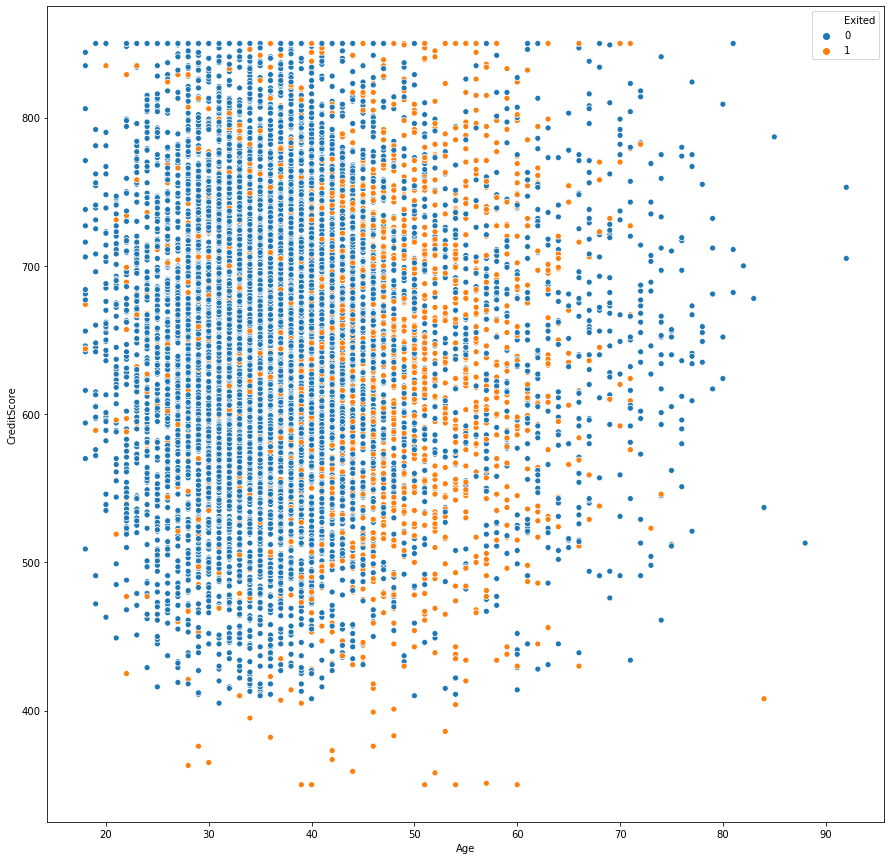

In [28]:
plt.figure(figsize=(15,15))
sns.scatterplot(y="CreditScore", x="Age", hue="Exited", data=bank_df2, legend = "brief", sizes=(20, 200))
#,size = ""

<b>Comment</b>: More exits across age (40 to 65) irrespective of credit score

#### We will check the relation between NumOfProducts, Balance and Exited features

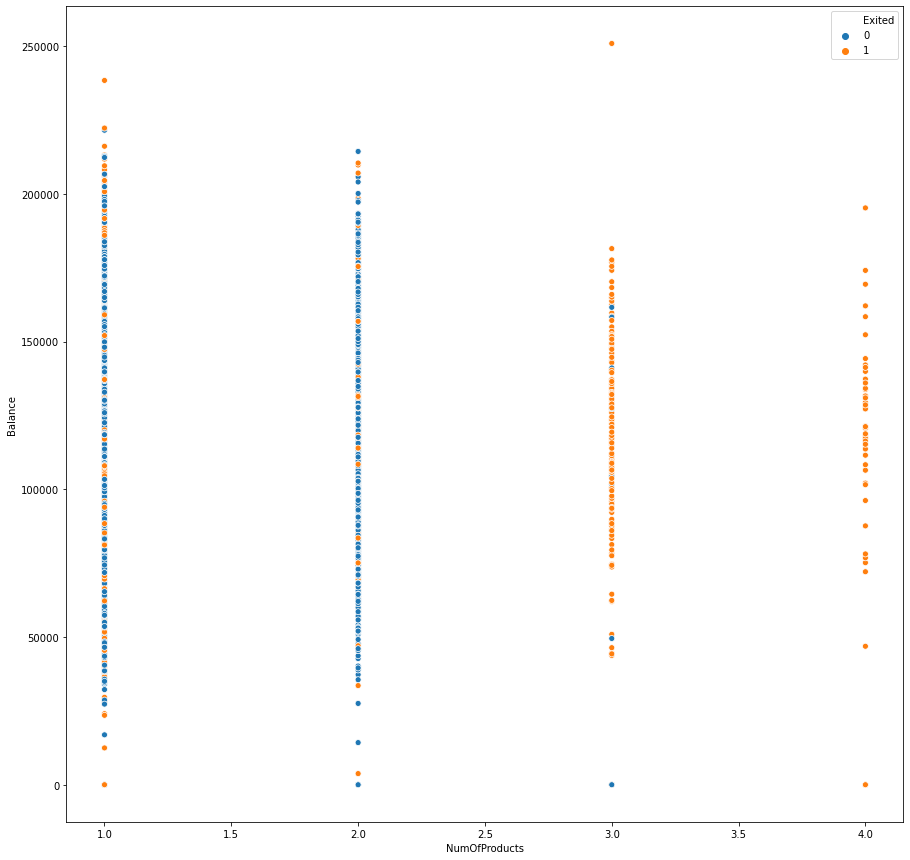

In [29]:
plt.figure(figsize=(15,15))
sns.scatterplot(y="Balance", x="NumOfProducts", hue="Exited", data=bank_df2, legend = "brief", sizes=(20, 200))
#,size = ""

<b>Comment</b>: More exits when number of products is 3 or 4 and a Balance range of 50K to 175K

#### We will check the relation between Tenure, IsActiveMember and Exited features

In [30]:
bank_df2.columns

Index(['CreditScore', 'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts',
       'HasCrCard', 'IsActiveMember', 'EstimatedSalary', 'Exited',
       'Geography_France', 'Geography_Germany', 'Geography_Spain'],
      dtype='object')

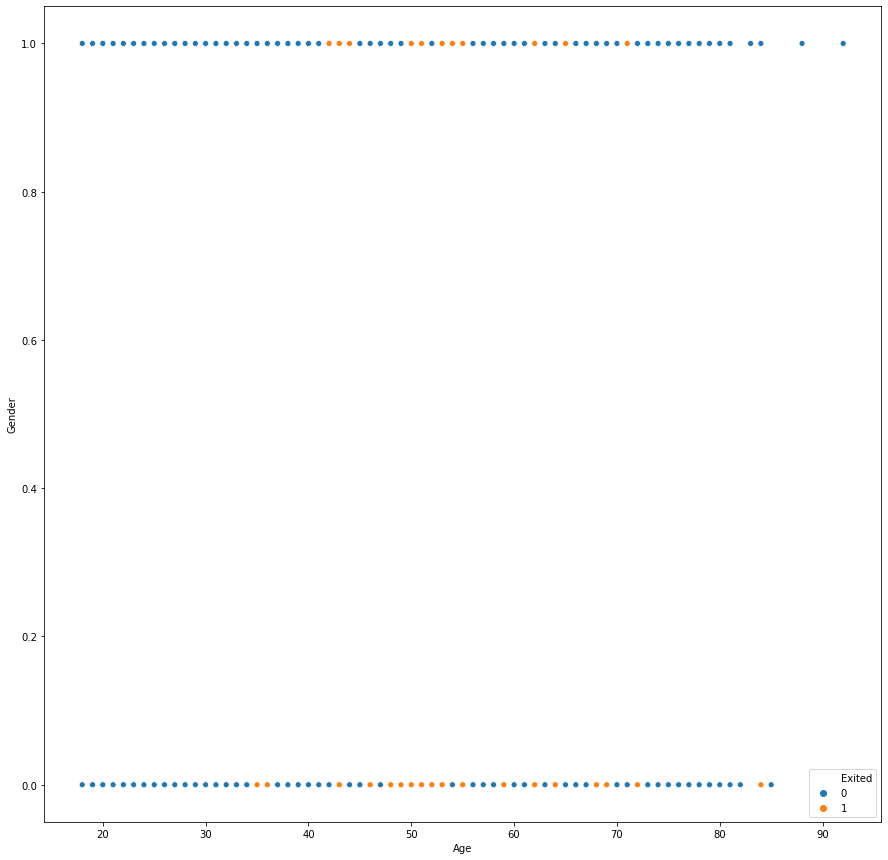

In [31]:
plt.figure(figsize=(15,15))
sns.scatterplot(y="Gender", x="Age", hue="Exited", data=bank_df2, legend = "brief", sizes=(20, 200))
#,size = ""

<b>Comment</b>: Looks like the for Females(Gender = 0) between late 40s to early 50s the exits are more. 

## 4. Distinguish the feature and target set and divide the data set into training and test sets (5 points)


#### We will split the data into Train(70% of data) and Test(30% of data) data sets

In [32]:
X_data = bank_df2.drop(columns = ['Exited'])

y_data = bank_df2.Exited

X_train, X_test, y_train, y_test  = train_test_split(X_data, y_data, test_size = 0.2, random_state = 7)

In [33]:
X_data.head()

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_France,Geography_Germany,Geography_Spain
0,619,0,42,2,0.00,1,1,1,101348.88,1,0,0
1,608,0,41,1,83807.86,1,0,1,112542.58,0,0,1
2,502,0,42,8,159660.80,3,1,0,113931.57,1,0,0
3,699,0,39,1,0.00,2,0,0,93826.63,1,0,0
4,850,0,43,2,125510.82,1,1,1,79084.10,0,0,1


In [34]:
y_data.head()

0    1
1    0
2    1
3    0
4    0
Name: Exited, dtype: int64

In [35]:
y_train.value_counts()

0    6374
1    1626
Name: Exited, dtype: int64

In [36]:
y_test.value_counts()

0    1589
1     411
Name: Exited, dtype: int64

<b>Comment</b>: Distribution of exited ratio between train and test data looks good. 

## 5. Normalize the train and test data (10points)


#### We will normalize the data using the standard scalar

In [37]:
#scaler = preprocessing.MinMaxScaler()
scaler = preprocessing.StandardScaler()
#fitting the transform on test and train separately
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [38]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(8000, 12)
(2000, 12)
(8000,)
(2000,)


## 6. Initialize & build the model. Identify the points of improvement and implement the same. (20)

#### We will build the neural network model

In [39]:
#Create a Sequential() model with no layers
model = Sequential(layers=None, name=None) 

#Add input, 2 hidden and 1 output layers
#12 is the number of input features
#units are the number of the neurons in the layer
#We will use activation function relu for input and hidden layers. 
#However for output layer we will use sigmoid as have only binay output(Exited feature)
model.add(Dense(units=8, input_shape = (12,), activation = 'relu')) #tanh , relu
model.add(Dense(units=5, activation = 'relu')) #tanh, relu
model.add(Dense(units=3, activation = 'relu')) #tanh, relu
model.add(Dense(units=1, activation = 'sigmoid'))

In [40]:
#Import the metrics Accuracy and Recall
from tensorflow.keras.metrics import Accuracy

In [41]:
#Setup the optimizer
opt = optimizers.Adam()# we will use the default learning rate 0.01
#opt = optimizers.Adam(lr = 0.03)
#opt = optimizers.Adagrad(lr = 0.002)
#opt = optimizers.Adadelta()
#opt = optimizers.RMSprop()

In [42]:
# we will compile the model. 
# Since the output is binary value, we will use binary cross entropy. We will set the metrics to accuracy and recall. 
model.compile(optimizer = opt, loss = 'binary_crossentropy', metrics=['accuracy'])

In [43]:
#We will print the summary for the model
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 8)                 104       
_________________________________________________________________
dense_1 (Dense)              (None, 5)                 45        
_________________________________________________________________
dense_2 (Dense)              (None, 3)                 18        
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 4         
Total params: 171
Trainable params: 171
Non-trainable params: 0
_________________________________________________________________


<b>Comment</b>: We can see the layers created with neurons, weights and bias. 

In [66]:
type(y_train)

pandas.core.series.Series

In [44]:
#We will fit the model with training data
model.fit(X_train, y_train.values, epochs = 100, verbose = 2, batch_size = 32, validation_split=0.2)#,callbacks=[tensorboard_cb]
# ,validation_split=0.20
#batch_size = 2000, 

Epoch 1/100
200/200 - 1s - loss: 0.5751 - accuracy: 0.7898 - val_loss: 0.5006 - val_accuracy: 0.7894
Epoch 2/100
200/200 - 0s - loss: 0.4673 - accuracy: 0.7986 - val_loss: 0.4628 - val_accuracy: 0.7950
Epoch 3/100
200/200 - 0s - loss: 0.4358 - accuracy: 0.8161 - val_loss: 0.4473 - val_accuracy: 0.8081
Epoch 4/100
200/200 - 0s - loss: 0.4211 - accuracy: 0.8178 - val_loss: 0.4396 - val_accuracy: 0.8062
Epoch 5/100
200/200 - 0s - loss: 0.4130 - accuracy: 0.8192 - val_loss: 0.4335 - val_accuracy: 0.8062
Epoch 6/100
200/200 - 0s - loss: 0.4045 - accuracy: 0.8169 - val_loss: 0.4257 - val_accuracy: 0.8119
Epoch 7/100
200/200 - 0s - loss: 0.3956 - accuracy: 0.8234 - val_loss: 0.4168 - val_accuracy: 0.8150
Epoch 8/100
200/200 - 0s - loss: 0.3868 - accuracy: 0.8319 - val_loss: 0.4041 - val_accuracy: 0.8281
Epoch 9/100
200/200 - 0s - loss: 0.3772 - accuracy: 0.8378 - val_loss: 0.3948 - val_accuracy: 0.8331
Epoch 10/100
200/200 - 0s - loss: 0.3679 - accuracy: 0.8448 - val_loss: 0.3832 - val_accura

Epoch 82/100
200/200 - 0s - loss: 0.3279 - accuracy: 0.8655 - val_loss: 0.3628 - val_accuracy: 0.8494
Epoch 83/100
200/200 - 0s - loss: 0.3276 - accuracy: 0.8655 - val_loss: 0.3607 - val_accuracy: 0.8525
Epoch 84/100
200/200 - 0s - loss: 0.3267 - accuracy: 0.8655 - val_loss: 0.3629 - val_accuracy: 0.8500
Epoch 85/100
200/200 - 0s - loss: 0.3269 - accuracy: 0.8633 - val_loss: 0.3678 - val_accuracy: 0.8456
Epoch 86/100
200/200 - 0s - loss: 0.3268 - accuracy: 0.8648 - val_loss: 0.3630 - val_accuracy: 0.8475
Epoch 87/100
200/200 - 0s - loss: 0.3270 - accuracy: 0.8650 - val_loss: 0.3611 - val_accuracy: 0.8519
Epoch 88/100
200/200 - 0s - loss: 0.3260 - accuracy: 0.8658 - val_loss: 0.3627 - val_accuracy: 0.8506
Epoch 89/100
200/200 - 0s - loss: 0.3272 - accuracy: 0.8656 - val_loss: 0.3649 - val_accuracy: 0.8500
Epoch 90/100
200/200 - 0s - loss: 0.3262 - accuracy: 0.8672 - val_loss: 0.3646 - val_accuracy: 0.8494
Epoch 91/100
200/200 - 0s - loss: 0.3266 - accuracy: 0.8634 - val_loss: 0.3633 - v

## 7. Predict the results using 0.5 as a threshold (10points)

In [45]:
#We will computes the loss on input data
results = model.evaluate(X_test, y_test.values)

63/63 [==============================] - 0s 623us/step - loss: 0.3489 - accuracy: 0.8580


In [46]:
#We will print the metrics loss and accuracy values
print(model.metrics_names)
print(results)    

['loss', 'accuracy']
[0.34887266159057617, 0.8579999804496765]


In [47]:
Y_pred = model.predict(X_test)

In [48]:
Y_pred_df = pd.DataFrame(Y_pred, columns=['Prediction'])

In [49]:
Y_pred_df

,Prediction
0,0.794183
1,0.068364
2,0.025670
3,0.598971
4,0.043821
...,...
1995,0.032806
1996,0.044025
1997,0.196091
1998,0.202195


In [50]:
# will predict using 0.5 Threshold
(Y_pred_df[Y_pred_df['Prediction'] >= 0.5].count())/Y_pred_df.count()*100

Prediction    12.65
dtype: float64

<b>Comment</b>: 12.65% of 2000 customers are predicated as churned

## 8. Print the Accuracy score and confusion matrix (5 points)

In [51]:
# we will get the classes for predicting metrics.
Y_pred_class = model.predict_classes(X_test, batch_size=200, verbose=0)

In [52]:
print('Accuracy: '+ str(model.evaluate(X_test,y_test.values)[1]))

print('Recall_score: ' + str(recall_score(y_test.values,Y_pred_class)))

print('Precision_score: ' + str(precision_score(y_test.values, Y_pred_class)))

print('F-score: ' + str(f1_score(y_test.values,Y_pred_class)))

63/63 [==============================] - 0s 670us/step - loss: 0.3489 - accuracy: 0.8580
Accuracy: 0.8579999804496765
Recall_score: 0.46228710462287104
Precision_score: 0.7509881422924901
F-score: 0.572289156626506


<b>Comment</b>: Although the Accuracy is high but the recall score is low.

In [53]:
#We will print the Confusion Matrix
confusion_matrix(y_test.values, Y_pred_class)

array([[1526,   63],
       [ 221,  190]])

In [54]:
#Save the model
model.save("P6BankChurnModel.h5")

In [55]:
#Read the model
model = keras.models.load_model("P6BankChurnModel.h5") 

### Hyper Tunning Model Parameters

We will try to improve the model by Hyper Tuning the model parameters

In [56]:
from tensorflow.keras import models
from tensorflow.keras import layers

In [57]:
def build_model(n_hidden_layer=1, n_neurons=8, input_shape=12, n_learning_rate=0.01, n_optimizer='Adam', n_activation='relu'):
    
    # create model
    model = Sequential()
    model.add(keras.Input(shape=(input_shape,)))

    
    temp=n_neurons
    i=0
    
    #---------------------The number of neurons in layer n+1 is 2/3 * Number of neurons in layer n---------------
    for layer in range(n_hidden_layer):
        
        model.add(Dense(n_neurons, activation=n_activation))
        n_neurons=int(round(n_neurons*2/3))
    

    
    
    model.add(Dense(1, activation = 'sigmoid'))
    
    # Compile model
    
    if n_optimizer == 'Adam':   
        optimizer=keras.optimizers.Adam(lr=n_learning_rate)
    elif n_optimizer == 'Adagrad':
        optimizer=keras.optimizers.Adagrad(lr=n_learning_rate)
    elif n_optimizer == 'Adadelta':
        optimizer=keras.optimizers.Adadelta(lr=n_learning_rate)
    elif n_optimizer == 'RMSprop':
        optimizer=keras.optimizers.RMSprop(lr=n_learning_rate)


        

    model.compile(optimizer = optimizer, loss = 'binary_crossentropy', metrics=['accuracy'])
    
    return model

In [58]:
from sklearn.base import clone
 
keras_class = tf.keras.wrappers.scikit_learn.KerasClassifier(build_fn = build_model,nb_epoch = 100,
                            batch_size=32)
clone(keras_class)

In [59]:
from scipy.stats import reciprocal
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV

param_distribs = {
    "n_hidden_layer": [1, 2, 3],
    "n_neurons": [6, 8, 10],
    "n_learning_rate": [0.1,0.05,0.01,0.005,0.001,0.0005],
     "n_optimizer":['Adam','Adagrad','Adadelta','RMSprop'],
    "n_activation":['relu','tanh']
}

rnd_search_cv = RandomizedSearchCV(keras_class, param_distribs, n_iter=50, cv=3, scoring='accuracy')
rnd_search_cv.fit(X_train, y_train.values, epochs=5)
#Grid_search_cv = GridSearchCV(keras_class, param_distribs, cv=3)
#Grid_search_cv.fit(X_train, y_train.values, epochs=5)


Epoch 1/5
167/167 [==============================] - 0s 459us/step - loss: 0.5935 - accuracy: 0.6925
Epoch 2/5
167/167 [==============================] - 0s 512us/step - loss: 0.4339 - accuracy: 0.8018
Epoch 3/5
167/167 [==============================] - 0s 447us/step - loss: 0.4157 - accuracy: 0.8124
Epoch 4/5
167/167 [==============================] - 0s 478us/step - loss: 0.4028 - accuracy: 0.8233
Epoch 5/5
167/167 [==============================] - 0s 453us/step - loss: 0.3990 - accuracy: 0.8310
Epoch 1/5
167/167 [==============================] - 0s 432us/step - loss: 0.5617 - accuracy: 0.7487
Epoch 2/5
167/167 [==============================] - 0s 444us/step - loss: 0.4342 - accuracy: 0.8160
Epoch 3/5
167/167 [==============================] - 0s 429us/step - loss: 0.4147 - accuracy: 0.8252
Epoch 4/5
167/167 [==============================] - 0s 436us/step - loss: 0.4141 - accuracy: 0.8222
Epoch 5/5
167/167 [==============================] - 0s 441us/step - loss: 0.4171 - accurac

167/167 [==============================] - 0s 434us/step - loss: 0.4980 - accuracy: 0.8047
Epoch 3/5
167/167 [==============================] - 0s 430us/step - loss: 0.4598 - accuracy: 0.8137
Epoch 4/5
167/167 [==============================] - 0s 456us/step - loss: 0.4466 - accuracy: 0.8096
Epoch 5/5
167/167 [==============================] - 0s 432us/step - loss: 0.4473 - accuracy: 0.8073
Epoch 1/5
167/167 [==============================] - 0s 426us/step - loss: 0.6937 - accuracy: 0.5960
Epoch 2/5
167/167 [==============================] - 0s 427us/step - loss: 0.5132 - accuracy: 0.7757
Epoch 3/5
167/167 [==============================] - 0s 440us/step - loss: 0.4643 - accuracy: 0.8020
Epoch 4/5
167/167 [==============================] - 0s 427us/step - loss: 0.4437 - accuracy: 0.8070
Epoch 5/5
167/167 [==============================] - 0s 427us/step - loss: 0.4284 - accuracy: 0.8098
Epoch 1/5
167/167 [==============================] - 0s 460us/step - loss: 0.7509 - accuracy: 0.4937


167/167 [==============================] - 0s 465us/step - loss: 0.6584 - accuracy: 0.6283
Epoch 4/5
167/167 [==============================] - 0s 452us/step - loss: 0.6672 - accuracy: 0.6234
Epoch 5/5
167/167 [==============================] - 0s 461us/step - loss: 0.6667 - accuracy: 0.6268
Epoch 1/5
167/167 [==============================] - 0s 461us/step - loss: 0.7143 - accuracy: 0.5085
Epoch 2/5
167/167 [==============================] - 0s 445us/step - loss: 0.7136 - accuracy: 0.5123
Epoch 3/5
167/167 [==============================] - 0s 451us/step - loss: 0.7210 - accuracy: 0.4958
Epoch 4/5
167/167 [==============================] - 0s 454us/step - loss: 0.7151 - accuracy: 0.5060
Epoch 5/5
167/167 [==============================] - 0s 455us/step - loss: 0.7120 - accuracy: 0.5164
Epoch 1/5
167/167 [==============================] - 0s 443us/step - loss: 0.8064 - accuracy: 0.5219
Epoch 2/5
167/167 [==============================] - 0s 452us/step - loss: 0.8039 - accuracy: 0.5158


167/167 [==============================] - 0s 451us/step - loss: 0.6566 - accuracy: 0.6220
Epoch 5/5
167/167 [==============================] - 0s 444us/step - loss: 0.6251 - accuracy: 0.6526
Epoch 1/5
167/167 [==============================] - 0s 436us/step - loss: 0.7567 - accuracy: 0.4985
Epoch 2/5
167/167 [==============================] - 0s 451us/step - loss: 0.7172 - accuracy: 0.5315
Epoch 3/5
167/167 [==============================] - 0s 437us/step - loss: 0.7027 - accuracy: 0.5390
Epoch 4/5
167/167 [==============================] - 0s 438us/step - loss: 0.6765 - accuracy: 0.5730
Epoch 5/5
167/167 [==============================] - 0s 437us/step - loss: 0.6461 - accuracy: 0.6162
Epoch 1/5
167/167 [==============================] - 1s 465us/step - loss: 0.7607 - accuracy: 0.5245
Epoch 2/5
167/167 [==============================] - 0s 487us/step - loss: 0.7232 - accuracy: 0.5519
Epoch 3/5
167/167 [==============================] - 0s 452us/step - loss: 0.6965 - accuracy: 0.5724


167/167 [==============================] - 0s 796us/step - loss: 0.4291 - accuracy: 0.8062
Epoch 1/5
167/167 [==============================] - 0s 500us/step - loss: 0.6796 - accuracy: 0.5646
Epoch 2/5
167/167 [==============================] - 0s 485us/step - loss: 0.5024 - accuracy: 0.7832
Epoch 3/5
167/167 [==============================] - 0s 474us/step - loss: 0.4289 - accuracy: 0.8091
Epoch 4/5
167/167 [==============================] - 0s 503us/step - loss: 0.4138 - accuracy: 0.8112
Epoch 5/5
167/167 [==============================] - 0s 476us/step - loss: 0.4046 - accuracy: 0.8127
Epoch 1/5
167/167 [==============================] - 0s 523us/step - loss: 0.6376 - accuracy: 0.7591
Epoch 2/5
167/167 [==============================] - 0s 638us/step - loss: 0.6316 - accuracy: 0.7715
Epoch 3/5
167/167 [==============================] - 0s 1ms/step - loss: 0.6302 - accuracy: 0.7766
Epoch 4/5
167/167 [==============================] - 0s 609us/step - loss: 0.6295 - accuracy: 0.7723
Ep

167/167 [==============================] - 1s 515us/step - loss: 0.5023 - accuracy: 0.7615
Epoch 2/5
167/167 [==============================] - 0s 682us/step - loss: 0.3805 - accuracy: 0.8427
Epoch 3/5
167/167 [==============================] - 0s 889us/step - loss: 0.3662 - accuracy: 0.8467
Epoch 4/5
167/167 [==============================] - 0s 605us/step - loss: 0.3620 - accuracy: 0.8470
Epoch 5/5
167/167 [==============================] - 0s 570us/step - loss: 0.3600 - accuracy: 0.8536
Epoch 1/5
167/167 [==============================] - 0s 490us/step - loss: 0.4803 - accuracy: 0.7746
Epoch 2/5
167/167 [==============================] - 0s 502us/step - loss: 0.3955 - accuracy: 0.8350
Epoch 3/5
167/167 [==============================] - 0s 498us/step - loss: 0.3781 - accuracy: 0.8398
Epoch 4/5
167/167 [==============================] - 0s 493us/step - loss: 0.3652 - accuracy: 0.8439
Epoch 5/5
167/167 [==============================] - 0s 490us/step - loss: 0.3647 - accuracy: 0.8536


167/167 [==============================] - 0s 538us/step - loss: 0.3846 - accuracy: 0.8378
Epoch 3/5
167/167 [==============================] - 0s 479us/step - loss: 0.3592 - accuracy: 0.8497
Epoch 4/5
167/167 [==============================] - 0s 465us/step - loss: 0.3562 - accuracy: 0.8510
Epoch 5/5
167/167 [==============================] - 0s 450us/step - loss: 0.3609 - accuracy: 0.8553
Epoch 1/5
167/167 [==============================] - 0s 461us/step - loss: 0.5356 - accuracy: 0.7138
Epoch 2/5
167/167 [==============================] - 0s 547us/step - loss: 0.3967 - accuracy: 0.8274
Epoch 3/5
167/167 [==============================] - 0s 511us/step - loss: 0.3633 - accuracy: 0.8546
Epoch 4/5
167/167 [==============================] - 0s 511us/step - loss: 0.3544 - accuracy: 0.8576
Epoch 5/5
167/167 [==============================] - 0s 511us/step - loss: 0.3425 - accuracy: 0.8613
Epoch 1/5
167/167 [==============================] - 0s 450us/step - loss: 0.7325 - accuracy: 0.5337


167/167 [==============================] - 0s 466us/step - loss: 0.5262 - accuracy: 0.7991
Epoch 4/5
167/167 [==============================] - 0s 463us/step - loss: 0.4913 - accuracy: 0.8040
Epoch 5/5
167/167 [==============================] - 0s 474us/step - loss: 0.4716 - accuracy: 0.8011
Epoch 1/5
167/167 [==============================] - 0s 477us/step - loss: 0.6569 - accuracy: 0.5793
Epoch 2/5
167/167 [==============================] - 0s 479us/step - loss: 0.6467 - accuracy: 0.6191
Epoch 3/5
167/167 [==============================] - 0s 473us/step - loss: 0.6454 - accuracy: 0.6470
Epoch 4/5
167/167 [==============================] - 0s 471us/step - loss: 0.6466 - accuracy: 0.6513
Epoch 5/5
167/167 [==============================] - 0s 483us/step - loss: 0.6388 - accuracy: 0.6777
Epoch 1/5
167/167 [==============================] - 0s 524us/step - loss: 0.8375 - accuracy: 0.2758
Epoch 2/5
167/167 [==============================] - 0s 473us/step - loss: 0.8376 - accuracy: 0.2705


167/167 [==============================] - 0s 577us/step - loss: 0.5315 - accuracy: 0.7874
Epoch 5/5
167/167 [==============================] - 0s 458us/step - loss: 0.5248 - accuracy: 0.7878
Epoch 1/5
167/167 [==============================] - 0s 431us/step - loss: 0.5732 - accuracy: 0.7362
Epoch 2/5
167/167 [==============================] - 0s 438us/step - loss: 0.5272 - accuracy: 0.7883
Epoch 3/5
167/167 [==============================] - 0s 434us/step - loss: 0.5094 - accuracy: 0.8032
Epoch 4/5
167/167 [==============================] - 0s 432us/step - loss: 0.4954 - accuracy: 0.8058
Epoch 5/5
167/167 [==============================] - 0s 432us/step - loss: 0.4892 - accuracy: 0.8016
Epoch 1/5
167/167 [==============================] - 0s 437us/step - loss: 0.6771 - accuracy: 0.6122
Epoch 2/5
167/167 [==============================] - 0s 442us/step - loss: 0.5629 - accuracy: 0.7473
Epoch 3/5
167/167 [==============================] - 0s 438us/step - loss: 0.5243 - accuracy: 0.7939


167/167 [==============================] - 0s 433us/step - loss: 0.7248 - accuracy: 0.5346
Epoch 1/5
167/167 [==============================] - 0s 479us/step - loss: 0.8625 - accuracy: 0.4423
Epoch 2/5
167/167 [==============================] - 0s 467us/step - loss: 0.8398 - accuracy: 0.4520
Epoch 3/5
167/167 [==============================] - 0s 457us/step - loss: 0.8283 - accuracy: 0.4565
Epoch 4/5
167/167 [==============================] - 0s 435us/step - loss: 0.8204 - accuracy: 0.4542
Epoch 5/5
167/167 [==============================] - 0s 435us/step - loss: 0.8108 - accuracy: 0.4639
Epoch 1/5
167/167 [==============================] - 0s 536us/step - loss: 0.6868 - accuracy: 0.5623
Epoch 2/5
167/167 [==============================] - 0s 486us/step - loss: 0.6120 - accuracy: 0.7112
Epoch 3/5
167/167 [==============================] - 0s 470us/step - loss: 0.5696 - accuracy: 0.7689
Epoch 4/5
167/167 [==============================] - 0s 477us/step - loss: 0.5425 - accuracy: 0.7763


RandomizedSearchCV(cv=3,
                   estimator=<tensorflow.python.keras.wrappers.scikit_learn.KerasClassifier object at 0x7fab7bc01490>,
                   n_iter=50,
                   param_distributions={'n_activation': ['relu', 'tanh'],
                                        'n_hidden_layer': [1, 2, 3],
                                        'n_learning_rate': [0.1, 0.05, 0.01,
                                                            0.005, 0.001,
                                                            0.0005],
                                        'n_neurons': [6, 8, 10],
                                        'n_optimizer': ['Adam', 'Adagrad',
                                                        'Adadelta',
                                                        'RMSprop']},
                   scoring='accuracy')

In [60]:
rnd_search_cv.best_params_

{'n_optimizer': 'Adam',
 'n_neurons': 6,
 'n_learning_rate': 0.01,
 'n_hidden_layer': 1,
 'n_activation': 'tanh'}

<b>Comment</b>: We can see the best parameters 

In [61]:
#Lets print the best training data accuracy score
rnd_search_cv.best_score_

0.8565005893393108

In [62]:
#Lets predict the score for test data
rnd_search_cv.score(X_test,y_test.values)

0.859

<b>Comment:</b> we have slightly improved the test data prediction accuracy using hyper tuning from 85.79 to 85.9%.  

In [63]:
# we will get the classes for predicting metrics.
Y_pred_class = rnd_search_cv.predict(X_test)


In [64]:
#print('Accuracy: '+ str(rnd_search_cv.evaluate(X_test,y_test.values)[1]))

print('Recall_score: ' + str(recall_score(y_test.values,Y_pred_class)))

print('Precision_score: ' + str(precision_score(y_test.values, Y_pred_class)))

print('F-score: ' + str(f1_score(y_test.values,Y_pred_class)))

Recall_score: 0.40632603406326034
Precision_score: 0.8146341463414634
F-score: 0.5422077922077922
